In [42]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/churn.csv')
col_names = df.columns.tolist()
print("Column names:")
print(col_names)
print(df.shape)

Column names:
['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']
(3333, 21)


# Data exploration

In [43]:
# Analysis:
# 1. State names and area codes can indicate the customer's location, but they have little to do with churn, so they should be deleted. 
# 2. Account length, phone number, not needed
# 3. International Plan, voice mail. There may be a connection, keep it for now. 
# 4. The minutes of calls, the number of calls, and the charging status during the daytime, evening, and night were counted separately. (retain)
# 5. Customer service hotline: if customers call to make many complaints, the churn rate may be high. (retain)
# 6. Whether to churn or not. This is the classification result.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [45]:
df.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [46]:
df['Churn?'].value_counts()

Churn?
False.    2850
True.      483
Name: count, dtype: int64

In [47]:
df['CustServ Calls'].value_counts()

CustServ Calls
1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: count, dtype: int64

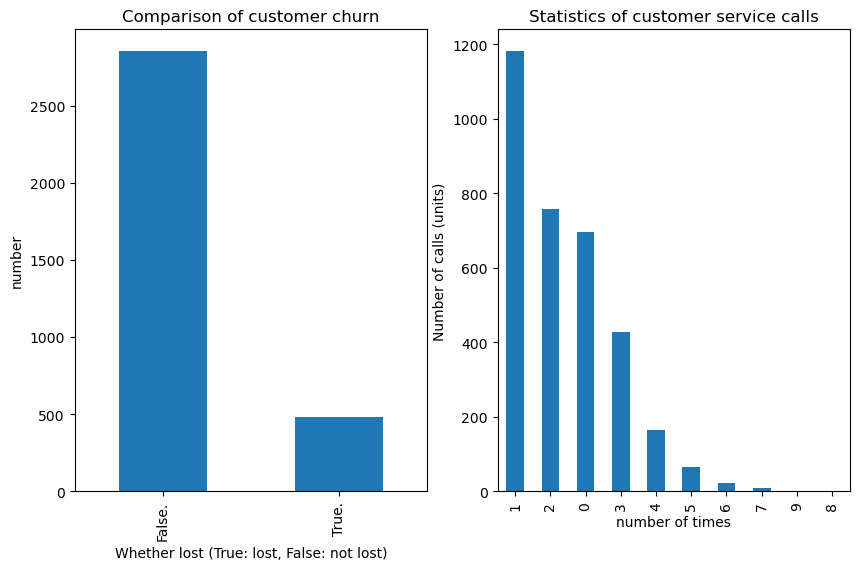

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,6))
fig.set(alpha=0.2)  # Set the alpha parameter for the chart color
plt.subplot(121)
df['Churn?'].value_counts().plot(kind='bar') # plots a bar graph of those who surived vs those who did not. 
plt.title(u"Comparison of customer churn") # puts a title on our graph
plt.ylabel(u"number")  
plt.xlabel(u"Whether lost (True: lost, False: not lost)")  
plt.subplot(122)           
df['CustServ Calls'].value_counts().plot(kind='bar')# plots a bar graph of those who surived vs those who did not. 
plt.title(u"Statistics of customer service calls") # puts a title on our graph
plt.ylabel(u"Number of calls (units)")  
plt.xlabel(u"number of times")  
plt.show()

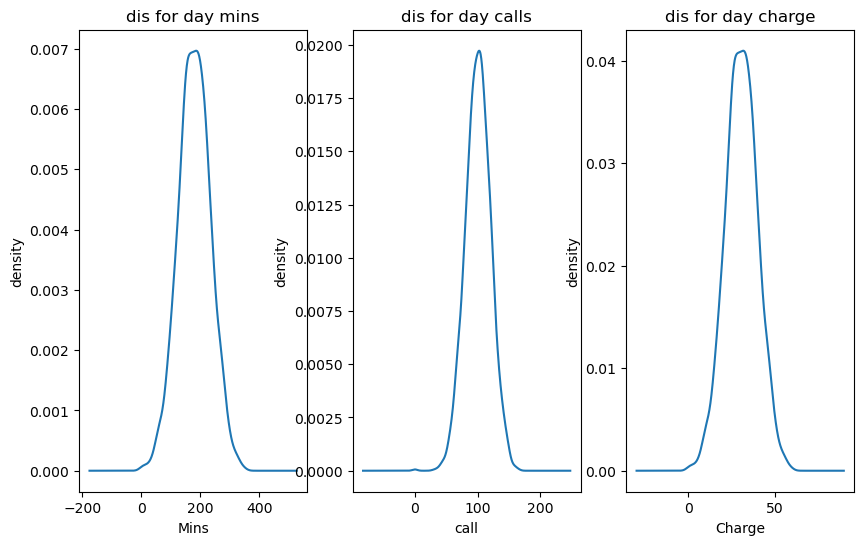

In [49]:
# Statistical Analysis on the Duration, Number and Cost of Customers' Phone Calls
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
df['Day Mins'].plot(kind='kde')    # plots a kernel desnsity estimate of customer 
plt.xlabel(u"Mins") # plots an axis lable
plt.ylabel(u"density") 
plt.title(u"dis for day mins")
plt.subplot(1,3,2)            
df['Day Calls'].plot(kind='kde')    # plots a kernel desnsity estimate of customer 
plt.xlabel(u"call") # plots an axis lable
plt.ylabel(u"density") 
plt.title(u"dis for day calls")
plt.subplot(1,3,3)           
df['Day Charge'].plot(kind='kde')   # plots a kernel desnsity estimate of customer 
plt.xlabel(u"Charge") # plots an axis lable
plt.ylabel(u"density") 
plt.title(u"dis for day charge")
plt.show()


## The association between features and classifications

### Explore the relationship between the International Plan (Int'l Plan) and whether there is churn (Churn?).

In [50]:
int_yes = df['Churn?'][df['Int\'l Plan'] == 'yes'].value_counts()
int_yes

Churn?
False.    186
True.     137
Name: count, dtype: int64

In [51]:
int_no = df['Churn?'][df['Int\'l Plan'] == 'no'].value_counts()
int_no

Churn?
False.    2664
True.      346
Name: count, dtype: int64

In [52]:
# Merge results
df_int=pd.DataFrame({'int plan':int_yes, 'no int plan':int_no})
df_int

,int plan,no int plan
Churn?,,
False.,186,2664
True.,137,346


<Figure size 1000x600 with 0 Axes>

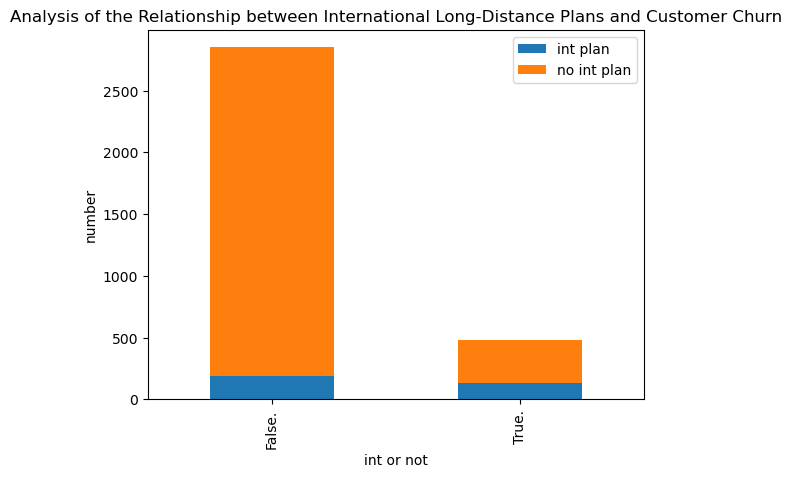

In [53]:
plt.figure(figsize=(10,6))
df_int.plot(kind='bar', stacked=True)
plt.title("Analysis of the Relationship between International Long-Distance Plans and Customer Churn")
plt.xlabel("int or not") 
plt.ylabel("number")
plt.show()

### Explore the relationship between customer service calls (CustServ Calls) and churn (Churn?)

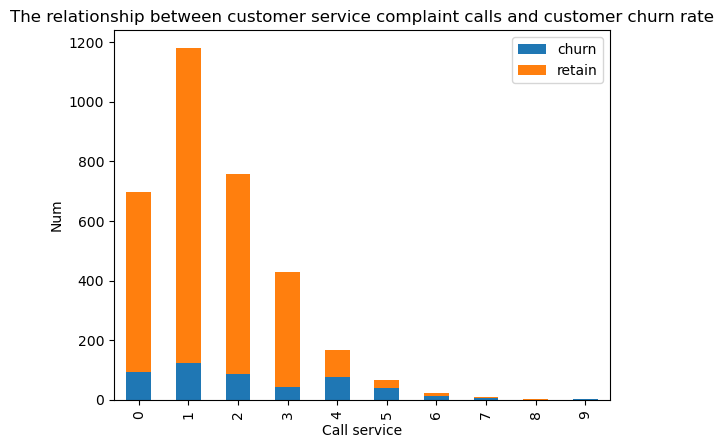

In [54]:
# Basically the same as above
cus_0 = df['CustServ Calls'][df['Churn?'] == 'False.'].value_counts()
cus_1 = df['CustServ Calls'][df['Churn?'] == 'True.'].value_counts()
df_01=pd.DataFrame({'churn':cus_1, 'retain':cus_0})
df_01.plot(kind='bar', stacked=True)
plt.title("The relationship between customer service complaint calls and customer churn rate")
plt.xlabel("Call service") 
plt.ylabel("Num") 
plt.show()

# Data Preparation

In [55]:
# 1. Numerical type conversion
ds_result = df['Churn?']
Y = np.where(ds_result == 'True.', 1, 0)

dummies_int = pd.get_dummies(df['Int\'l Plan'], prefix='_int\'l Plan')
dummies_voice = pd.get_dummies(df['VMail Plan'], prefix='VMail')
ds_tmp=pd.concat([df, dummies_int, dummies_voice], axis=1)
ds_tmp.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,_int'l Plan_no,_int'l Plan_yes,VMail_no,VMail_yes
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,11.01,10.0,3,2.70,1,False.,True,False,False,True
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,11.45,13.7,3,3.70,1,False.,True,False,False,True
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,7.32,12.2,5,3.29,0,False.,True,False,True,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,8.86,6.6,7,1.78,2,False.,False,True,True,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,8.41,10.1,3,2.73,3,False.,False,True,True,False


In [56]:
# 2. Delete useless fields
to_drop = ['State','Area Code','Phone','Churn?', 'Int\'l Plan', 'VMail Plan']
df = ds_tmp.drop(to_drop,axis=1)

In [57]:
print("after trans: ")
df.head(5)

after trans: 


,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,_int'l Plan_no,_int'l Plan_yes,VMail_no,VMail_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,True,False,False,True
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,True,False,False,True
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,True,False,True,False
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,True,True,False
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,True,True,False


In [58]:
# 3. Data standardization
# Scale
X = df.values.astype(np.float64)
# This is important
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

print("Feature space holds %d observations and %d features" % X.shape)
print("Unique target labels:", np.unique(Y))
print(X[0])
print(len([Y == 0]))

Feature space holds 3333 observations and 19 features
Unique target labels: [0 1]
[ 0.67648946  1.23488274  1.56676695  0.47664315  1.56703625 -0.07060962
 -0.05594035 -0.07042665  0.86674322 -0.46549436  0.86602851 -0.08500823
 -0.60119509 -0.0856905  -0.42793202  0.32758048 -0.32758048 -1.6170861
  1.6170861 ]
1


# Algorithm training, prediction and evaluation

In [60]:
# 1. Classification prediction 
# Using logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=123456)
# Instantiate the model and train it
model = LogisticRegression()
model.fit(X_train, y_train)
print("Check the model results: ")
print(model.coef_)
print(model.intercept_)
print("Calculate the accuracy rate of the training results:")
print(model.score(X_test,y_test))

# First, make predictions on the test set.
y_pred = model.predict(X_test) # Predict category labels
y_pred_prob = model.predict_proba(X_test) # Predicted class probability

print(y_pred[0:5])
print(y_pred_prob[0:5])
print("Print the classification evaluation report:")
# 分类评估报告 classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,y_pred)
print("Model AUC score:",auc )


Check the model results: 
[[-0.00541965  0.32999348  0.33049971  0.06951028  0.33068548  0.1096074
  -0.01240431  0.10896059  0.08653918 -0.01420835  0.0864735   0.11377567
  -0.25237416  0.12360883  0.7052939  -0.31253573  0.31253573  0.33719272
  -0.33719272]]
[-2.32049403]
Calculate the accuracy rate of the training results:
0.859
[0 0 0 0 0]
[[0.97014774 0.02985226]
 [0.96134476 0.03865524]
 [0.94410711 0.05589289]
 [0.94397041 0.05602959]
 [0.96684953 0.03315047]]
Print the classification evaluation report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       846
           1       0.61      0.23      0.33       154

    accuracy                           0.86      1000
   macro avg       0.74      0.60      0.63      1000
weighted avg       0.83      0.86      0.83      1000

Model AUC score: 0.6006339995701698


In [61]:
# Save the model results for reuse
print("1. First, import the dump and load classes from the pickle package")
from pickle import dump
from pickle import load
print("2. Export the previous logistic regression example to the mymodel.logic file")
filename = 'mymodel.logic'
dump(model, open(filename, 'wb'))
print("3. Load the logistic regression instance from the mymodel.logic file")
loaded_model = load(open(filename, 'rb'))
print("4. Train the previous X_test and y_test datasets and obtain the score evaluation.")
result = loaded_model.score(X_test, y_test)
print(result)


1. First, import the dump and load classes from the pickle package
2. Export the previous logistic regression example to the mymodel.logic file
3. Load the logistic regression instance from the mymodel.logic file
4. Train the previous X_test and y_test datasets and obtain the score evaluation.
0.859
